In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [60]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [61]:
testID = test['PassengerId']
train.drop('PassengerId',axis=1,inplace=True)
test.drop('PassengerId',axis=1,inplace=True)

In [62]:
train.info()
train.describe()
train.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


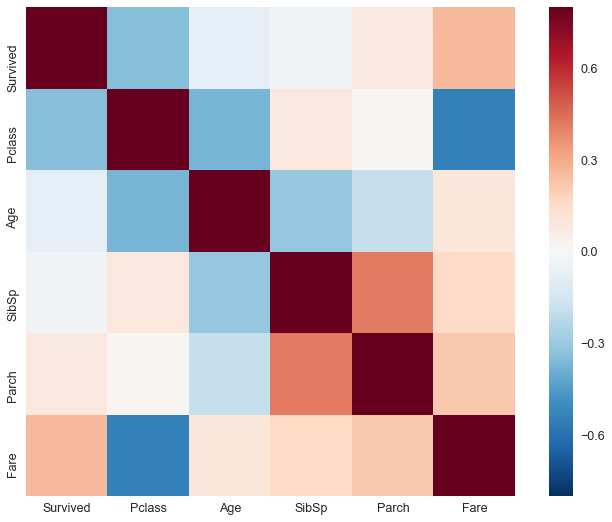

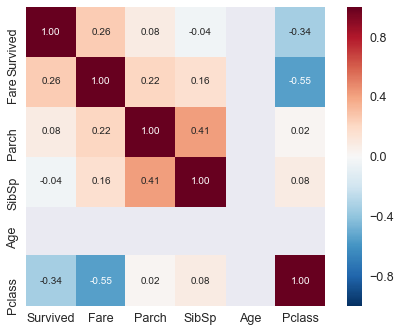

In [63]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Survived')['Survived'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [70]:
outliers = detect_outliers(train,2,['Age','SibSp','Parch','Fare'])

In [71]:
train = train.drop(outliers,axis=0).reset_index(drop=True)

In [72]:
y_train = train['Survived']
train = train.loc[:, train.columns != 'Survived'] 
df = pd.concat([train,test],axis=0).reset_index(drop=True)

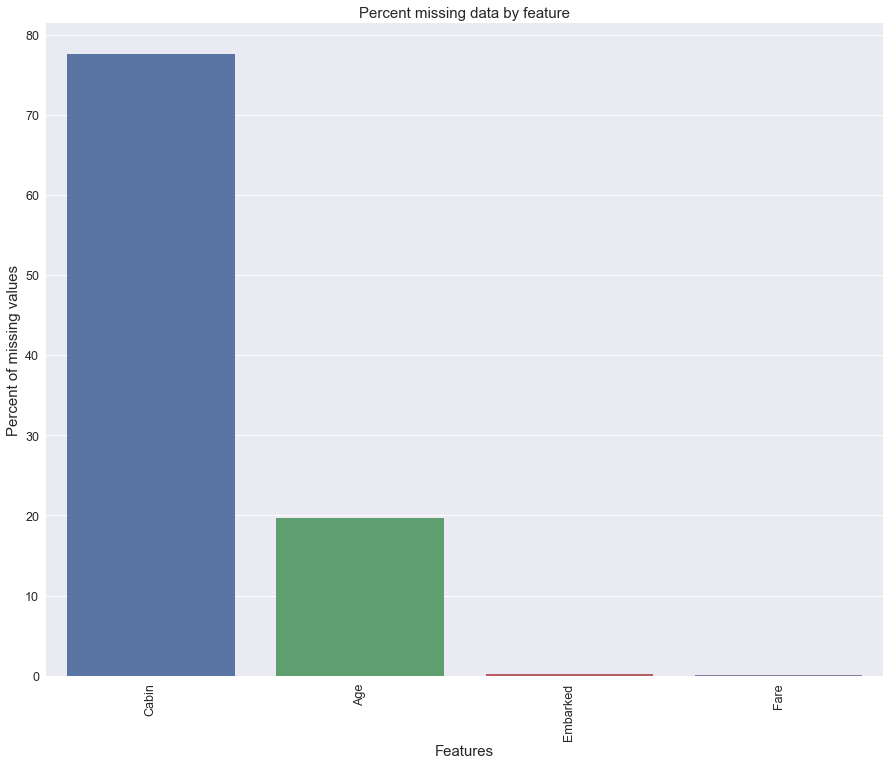

In [73]:
#missing data analysis
#observe missing values
all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.show()

In [74]:
#feature engineering I - filling missing values
df.Cabin.fillna('M',inplace=True)
df.Sex = df.Sex.map({"female":1,"male":0})
df["Age"] = df.groupby(["Pclass","Parch","SibSp"])["Age"].transform(
    lambda x: x.fillna(x.median()))
df["Age"].fillna(df['Age'].median(),inplace = True)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'].fillna(df['Fare'].mean(),inplace = True)

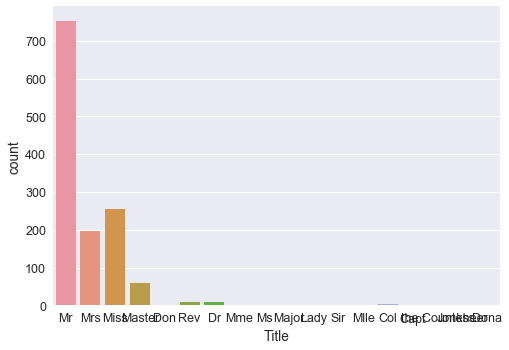

In [75]:
#feature engineering II - artificial features title
# Get Title from Name
titles = [i.split(",")[1].split(".")[0].strip() for i in df["Name"]]
df["Title"] = pd.Series(titles)
g = sns.countplot(x="Title",data=df)
plt.show()

def title_transformer(x):
    if x == 'Mr':
        return 1
    elif x == "Mrs" or x == "Miss":
        return 2
    elif x == "Master":
        return 3
    else: return 4

df['Title'] = df['Title'].map(lambda x:title_transformer(x))
df.drop('Name',axis=1,inplace=True)

df.Cabin = [''.join(c for c in x.split(' ')[0] if not c.isdigit()) for x in df.Cabin]

In [76]:
#feature engineering II - artificial features Ticket
tickets =  [i.replace(".","").replace("/","").strip().split(' ')[0] for i in df['Ticket']]
tickets =  ["T" if not x.isdigit() else 'X' for x in tickets]
df['Ticket'] = tickets

In [77]:
all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [78]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,0,22.0,1,0,T,7.2500,M,S,1
1,1,1,38.0,1,0,T,71.2833,C,C,2
2,3,1,26.0,0,0,T,7.9250,M,S,2
3,1,1,35.0,1,0,X,53.1000,C,S,2
4,3,0,35.0,0,0,X,8.0500,M,S,1


In [79]:
# #plot distribution of target variable
# sns.distplot(y_train);
# plt.show()
# print("Skewness: %f" % y_train.skew())
# print("Kurtosis: %f" % y_train.kurt())

In [80]:
#log transform skewed numeric features:
numeric_feats = df.dtypes[df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df[numeric_feats].apply(lambda x: (x.dropna()).skew()).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(20)
print abs(skewness)


Skew in numerical features: 

            Skew
Fare    4.511736
Parch   3.799177
SibSp   3.190647
Title   1.441539
Sex     0.607255
Age     0.530527
Pclass  0.596508


In [81]:
skewness = skewness[abs(skewness['Skew']) > 0.75]
print skewness
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))


from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0
for feat in skewed_features:
    #all_data[feat] += 1
    df[feat] = boxcox1p(df[feat], lam)
    #df[feat] = np.log1p(df[feat])
    
# #all_data[skewed_features] = np.log1p(all_data[skewed_features])


           Skew
Fare   4.511736
Parch  3.799177
SibSp  3.190647
Title  1.441539
There are 4 skewed numerical features to Box Cox transform


In [82]:
# #outlier detection (numerical)
# #Percentile Detection
        
def detect_outliers(df,n,features):
    outlier_indices = []
    # iterate over features(coluns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers   

# # def generate_correlation_matrix(df,cols):
# #     g= sns.heatmap(df[cols].corr(),annot=True,fmt=".2f",cmap="coolwarm")
# #     plt.show()

# # #univariate:X takes limited discrete values
# # def generate_factor_plot(df,x,y):
# #     g = sns.factorplot(x,y,data=df,kind='bar',size=6)
# #     g.despine(left=True)
# #     g = g.set_ylabels("Y")
# #     plt.show()
    
# # #continous varible distribution
# # def generate_factor_plot(df,x,y):
# #     g = sns.factorplot(x,y,data=df,kind='bar',size=6)
# #     g.despine(left=True)
# #     g = g.set_ylabels("Y")
# #     plt.show()
    
# # def generate_dist_plot(df,col):
# #     g = sns.distplot(df[col],color='m',label='Skewness: %.2f'%(df[col].skew()))
# #     g = g.legend(loc='best')
# #     plt.show()


# df = df.drop(detect_outliers(df,2,["Age","SibSp","Parch","Fare"]),axis=0).reset_index(drop=True)

# # generate_factor_plot(df,'Parch','Survived')

# # generate_factor_plot(df,'Sex','Survived')

# # g = sns.FacetGrid(train,col='Survived')
# # g = g.map(sns.distplot,"Age")
# # #g = g.map(sns.distplot,"Pclass")
# # plt.show()

# # df['Fare'].isnull().sum()
# # df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# # generate_dist_plot(df,'Fare')

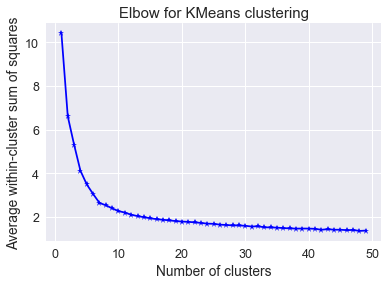

In [104]:
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import euclidean_distances, silhouette_score
K = range(1,50)
X = df.values
KM = [KMeans(n_clusters=k).fit(X) for k in K]
centroids = [k.cluster_centers_ for k in KM]
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')
plt.show()

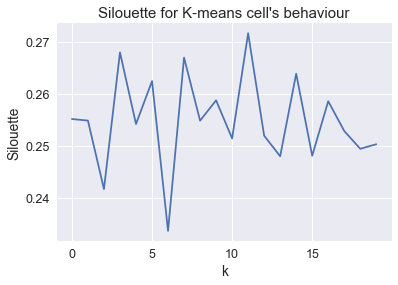

In [105]:
#################silouette score
s = []
for n_clusters in range(30,50):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    s.append(silhouette_score(X, labels, metric='euclidean'))
plt.plot(s)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")
plt.show()

In [107]:
cluster = KMeans(n_clusters = 11, random_state = 2)
df['cluster'] = cluster.fit_predict(X)
df.cluster.value_counts()

7     323
3     171
10    140
0     140
6     133
8     108
1      99
5      60
9      56
2      42
4      27
Name: cluster, dtype: int64

In [108]:
df = pd.get_dummies(df)
x_train = df.iloc[:train.shape[0]]
x_test = df.iloc[train.shape[0]:]

In [109]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Ticket_T,Ticket_X,Cabin_A,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,cluster
0,3,0,22.0,0.693147,0.0,2.110213,0.693147,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,1,38.0,0.693147,0.0,4.280593,1.098612,1,0,0,...,0,0,0,0,0,0,1,0,0,6
2,3,1,26.0,0.000000,0.0,2.188856,1.098612,1,0,0,...,0,0,0,0,1,0,0,0,1,7
3,1,1,35.0,0.693147,0.0,3.990834,1.098612,0,1,0,...,0,0,0,0,0,0,0,0,1,8
4,3,0,35.0,0.000000,0.0,2.202765,0.693147,0,1,0,...,0,0,0,0,1,0,0,0,1,8


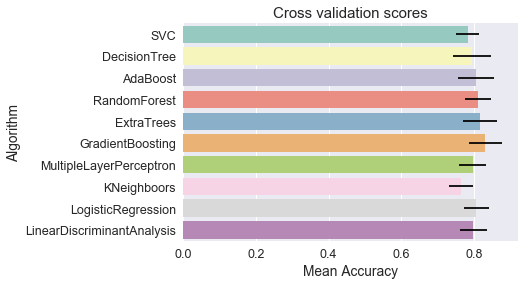

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, x_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [111]:
print  cv_means

[0.78208631256384065, 0.79463738508682336, 0.80480081716036778, 0.81045709908069463, 0.81617722165474971, 0.83086057201225727, 0.79569713993871294, 0.76393003064351372, 0.80593718079673127, 0.79799540347293163]


In [112]:
### META MODELING  WITH ADABOOST, RF, EXTRATREES and GRADIENTBOOSTING

# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[30,50],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(x_train,y_train)

ada_best = gsadaDTC.best_estimator_
gsadaDTC.best_score_


Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    8.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   21.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   43.4s
[Parallel(n_jobs=4)]: Done 640 out of 640 | elapsed:  1.0min finished


0.81838819523269013

In [113]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()
## Search grid for optimal parameters
ex_param_grid = {"max_depth": [5],
              "max_features": [1, 3, 5, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,200,500],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(x_train,y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_


Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   24.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  7.2min
[Parallel(n_jobs=4)]: Done 1080 out of 1080 | elapsed:  9.9min finished


0.83087400681044266

In [114]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [5],
              "max_features": [1, 3, 5,10],
              #"min_samples_split": [2, 3, 10],
              #"min_samples_leaf": [1, 3, 10],
              #"bootstrap": [False],
              "n_estimators" :[100,200,500],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(x_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   25.3s
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:  1.2min finished


0.84108967082860386

In [115]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,500],
              'learning_rate': [0.05,0.02,0.01,0.005],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(x_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_


Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    8.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   18.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   36.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:  1.3min finished


0.82292849035187288

In [116]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [0.1,1, 10, 100,1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(x_train,y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    8.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   22.8s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:   23.6s finished


0.82519863791146419

In [117]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt




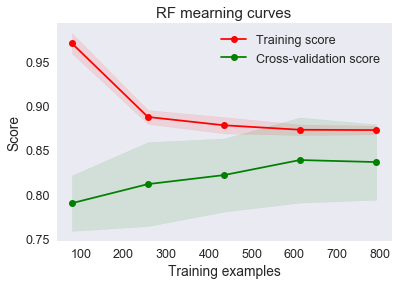

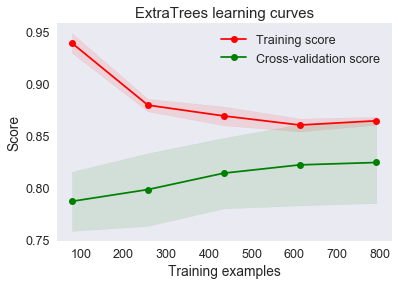

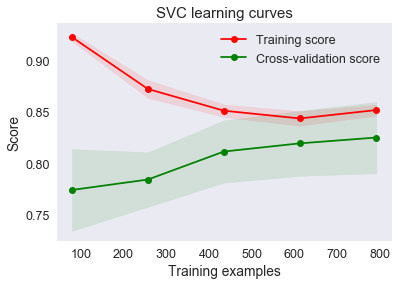

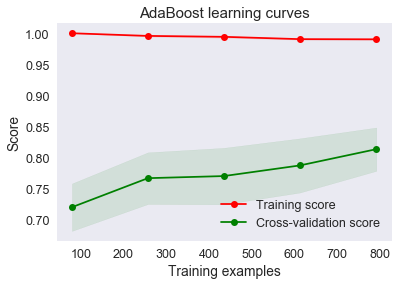

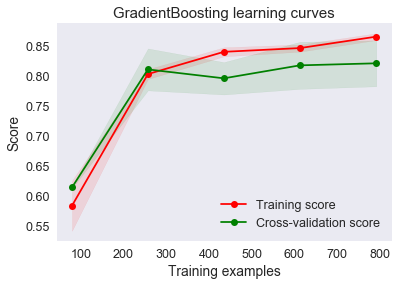

In [118]:
g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",x_train,y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",x_train,y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",x_train,y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",x_train,y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",x_train,y_train,cv=kfold)


In [119]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from vecstack import stacking
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix


# Caution! All models and parameter values are just 
# demonstrational and shouldn't be considered as recommended.
# Initialize 1-st level models.
models = [
    #ada_best,
    SVMC_best,
    GBC_best,
    RFC_best,
    ExtC_best
    
#     XGBClassifier(seed = 0, n_jobs = -1, learning_rate = 0.1, 
#         n_estimators = 100, max_depth = 3)]
    ]
    
# Compute stacking features
S_train, S_test = stacking(models, x_train.values, y_train.values, x_test.values, 
    regression = False, metric = accuracy_score, n_folds = 10, 
    stratified = True, shuffle = True, random_state = 0, verbose = 2)


task:   [classification]
metric: [accuracy_score]

model 0: [SVC]
    fold 0: [0.80898876]
    fold 1: [0.82954545]
    fold 2: [0.84090909]
    fold 3: [0.80681818]
    fold 4: [0.81818182]
    fold 5: [0.79545455]
    fold 6: [0.78409091]
    fold 7: [0.81818182]
    fold 8: [0.80681818]
    fold 9: [0.85227273]
    ----
    MEAN:   [0.81611805]

model 1: [GradientBoostingClassifier]
    fold 0: [0.79775281]
    fold 1: [0.78409091]
    fold 2: [0.85227273]
    fold 3: [0.81818182]
    fold 4: [0.79545455]
    fold 5: [0.81818182]
    fold 6: [0.82954545]
    fold 7: [0.82954545]
    fold 8: [0.86363636]
    fold 9: [0.85227273]
    ----
    MEAN:   [0.82406356]

model 2: [RandomForestClassifier]
    fold 0: [0.79775281]
    fold 1: [0.81818182]
    fold 2: [0.88636364]
    fold 3: [0.82954545]
    fold 4: [0.82954545]
    fold 5: [0.81818182]
    fold 6: [0.80681818]
    fold 7: [0.84090909]
    fold 8: [0.84090909]
    fold 9: [0.88636364]
    ----
    MEAN:   [0.83541430]

model 3

In [120]:
#secondary model
# Initialize 2-nd level model


# GBC = GradientBoostingClassifier()
# gb_param_grid = {'loss' : ["deviance"],
#               'n_estimators' : [100,200,500],
#               'learning_rate': [0.05,0.02,0.01,0.005],
#               'max_depth': [4, 8],
#               'min_samples_leaf': [100,150],
#               'max_features': [0.3, 0.1] 
#               }

# gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# gsGBC.fit(S_train,y_train)

# GBC_best = gsGBC.best_estimator_

# model = GBC_best


# SVMC = SVC(probability=True)
# svc_param_grid = {'kernel': ['rbf'], 
#                   'gamma': [ 0.001, 0.01, 0.1, 1],
#                   'C': [0.0001,0.001,0.1,1, 10, 100,1000]}

# gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# gsSVMC.fit(S_train,y_train)

# SVMC_best = gsSVMC.best_estimator_

# model = SVMC_best

model = LogisticRegression()

    
# Fit 2-nd level model
model = model.fit(S_train, y_train)

# Predict
y_pred = model.predict(S_train)

print confusion_matrix(y_train,y_pred)

# Final prediction score
print('Final prediction score: [%.8f]' % accuracy_score(y_train, y_pred))

[[489  52]
 [ 92 248]]
Final prediction score: [0.83654938]


<module 'matplotlib.pyplot' from 'C:\Users\Charles\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

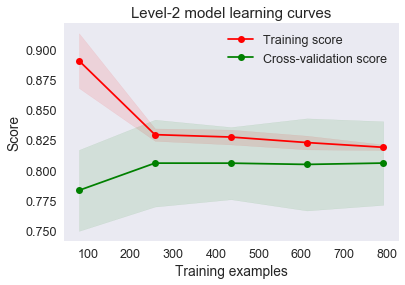

In [121]:
plot_learning_curve(model,"Level-2 model learning curves",x_train,y_train,cv=kfold)

In [122]:
#output to test files
y_pred = model.predict(S_test)
sub = pd.DataFrame()
sub['PassengerId'] = testID
sub['Survived'] = y_pred
sub.to_csv('submission.csv',index=False)

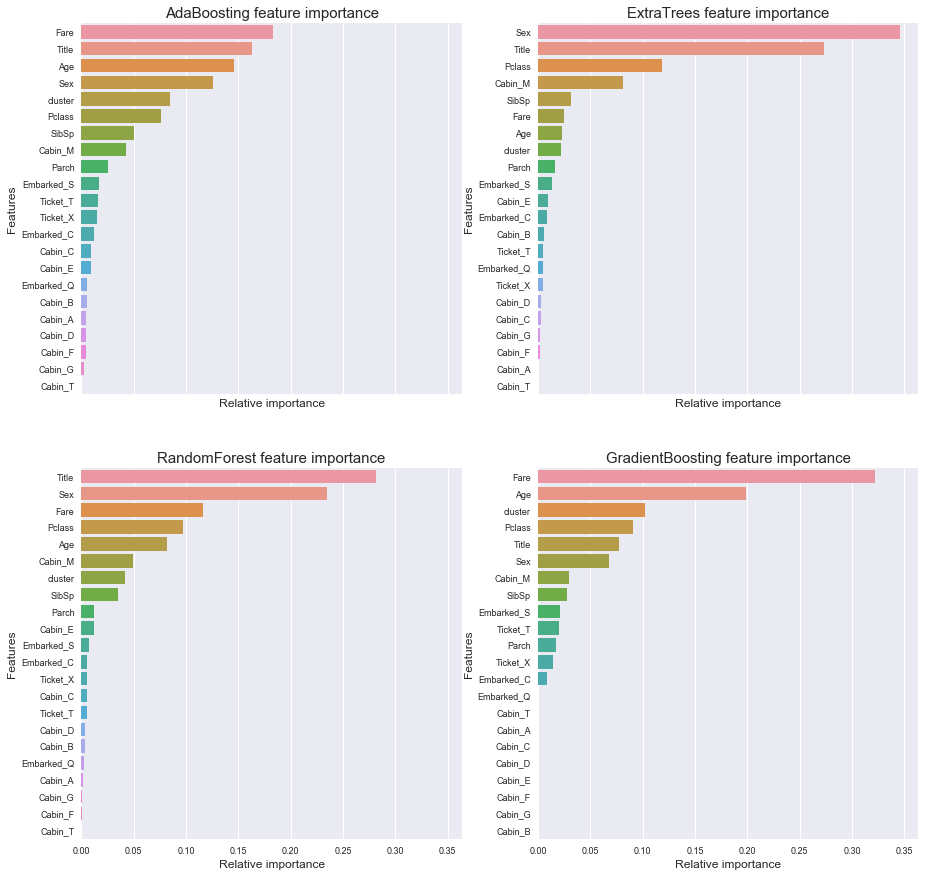

In [123]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best),("ExtraTrees",ExtC_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=x_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1
        
plt.show()

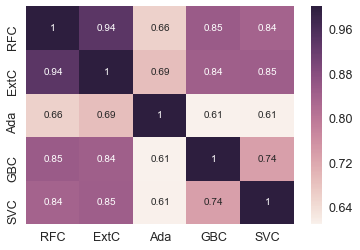

In [124]:
test = x_test
test_Survived_RFC = pd.Series(RFC_best.predict(test), name="RFC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(test), name="ExtC")
test_Survived_SVMC = pd.Series(SVMC_best.predict(test), name="SVC")
test_Survived_AdaC = pd.Series(ada_best.predict(test), name="Ada")
test_Survived_GBC = pd.Series(GBC_best.predict(test), name="GBC")


# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,test_Survived_AdaC,test_Survived_GBC, test_Survived_SVMC],axis=1)
g= sns.heatmap(ensemble_results.corr(),annot=True)

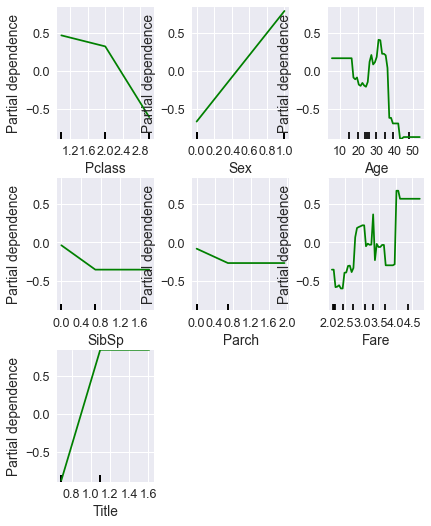

In [145]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence
plot_partial_dependence(models[1], X=x_train,features=[0,1,2,3,4,5,6],feature_names=df.columns,label=0,grid_resolution=50)
plt.subplots_adjust(top=1.8,left=0.1)
plt.show()

In [43]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(x_train, y_train)
test_Survived = pd.Series(votingC.predict(x_test), name="Survived")

results = pd.concat([testID,test_Survived],axis=1)

results.to_csv("ensemble_python_voting.csv",index=False)

In [131]:
x_train.columns.size

22